## FFT-Based Frequency Band Energy Visualisation  

- This notebook demonstrates how to process sensor data from the **Open Seizure Database (OSDB)**, applying **Fast Fourier Transform (FFT)** to analyse frequency components in the **0-25 Hz** range and visualise the energy distribution across **low** (0-2 Hz), **mid** (2-10 Hz), and **high** (10-25 Hz) frequency bands over time.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import pandas as pd
import json

# Load the JSON file
file_path = '../../tests/testData/testDataVisualisation.json'  # Replace with your JSON file path
with open(file_path, 'r') as file:
    raw_json = json.load(file)

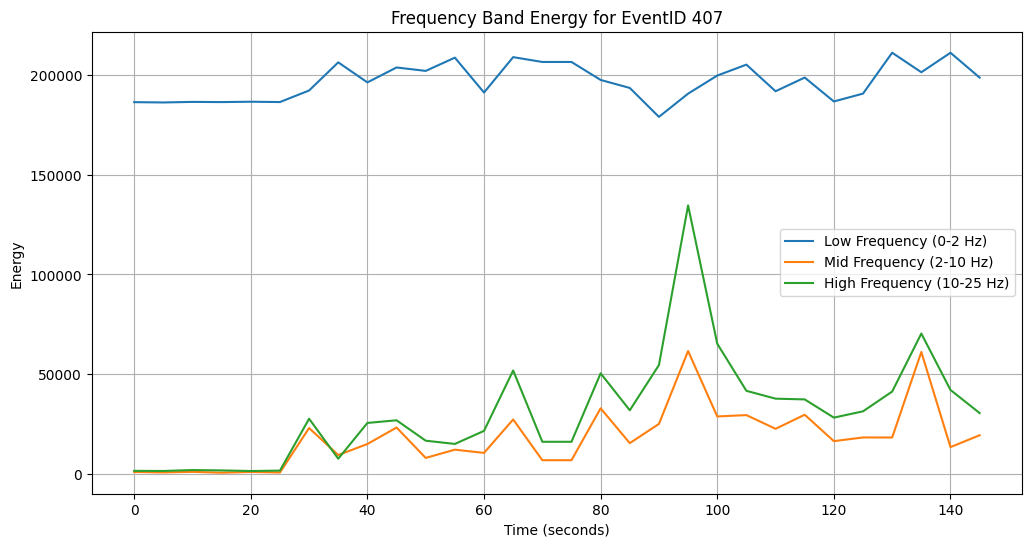

In [5]:
# Flatten the JSON and extract relevant fields
flattened_data = []

for attribute in raw_json:
    user_id = attribute.get('userId', None)
    datapoints = attribute.get('datapoints', [])

    for point in datapoints:
        event_id = point.get('eventId', None)
        hr = point.get('hr', [])
        o2Sat = point.get('o2Sat', [])
        rawData = point.get('rawData', [])
        rawData3D = point.get('rawData3D', [])
        # Append every datapoint as a row
        flattened_data.append({
            'eventId': event_id,
            'userId': user_id,
            'hr': hr,
            'o2Sat': o2Sat,
            'rawData': rawData,
            'rawData3D': rawData3D,

        })
        
# Create a DataFrame
df_sensordata = pd.DataFrame(flattened_data)


# Filter rows for eventId 407
event_id = 407
filtered_data = df_sensordata[df_sensordata['eventId'] == event_id]

# Total number of rows for the event
num_rows = len(filtered_data)

# Calculate total time (in seconds)
total_time = num_rows * 5

# Generate x-axis points for each rawData point
time_points = np.linspace(0, total_time, num_rows * 125)  # 125 samples per row

# Flatten the rawData column for plotting
raw_data = np.hstack(filtered_data['rawData'].values)

# Function to compute FFT and energy in frequency bands
def compute_frequency_bands(signal, fs=125):
    # Compute FFT of the signal
    fft_values = np.fft.fft(signal)
    fft_freqs = np.fft.fftfreq(len(signal), 1/fs)
    
    # Get the magnitude of the FFT
    fft_magnitude = np.abs(fft_values)
    
    # Define frequency bands (in Hz)
    low_freq_band = (0, 2)     # Low frequency: 0-2 Hz
    mid_freq_band = (2, 10)    # Mid frequency: 2-10 Hz
    high_freq_band = (10, 25)  # High frequency: 10-25 Hz
    
    # Compute energy in each frequency band
    low_energy = np.sum(fft_magnitude[(fft_freqs >= low_freq_band[0]) & (fft_freqs <= low_freq_band[1])])
    mid_energy = np.sum(fft_magnitude[(fft_freqs >= mid_freq_band[0]) & (fft_freqs <= mid_freq_band[1])])
    high_energy = np.sum(fft_magnitude[(fft_freqs >= high_freq_band[0]) & (fft_freqs <= high_freq_band[1])])
    
    return low_energy, mid_energy, high_energy

# Compute energy for each 5-second window and store results
low_energy_list = []
mid_energy_list = []
high_energy_list = []

for i in range(num_rows):
    # Extract raw data for the current row
    row_data = filtered_data.iloc[i]['rawData']
    
    # Compute energy for the current row using FFT
    low_energy, mid_energy, high_energy = compute_frequency_bands(row_data)
    
    # Store energy values for plotting
    low_energy_list.append(low_energy)
    mid_energy_list.append(mid_energy)
    high_energy_list.append(high_energy)

# Plot the relative energy of the frequency bands over time
plt.figure(figsize=(12, 6))
plt.plot(np.arange(num_rows) * 5, low_energy_list, label="Low Frequency (0-2 Hz)", color='tab:blue')
plt.plot(np.arange(num_rows) * 5, mid_energy_list, label="Mid Frequency (2-10 Hz)", color='tab:orange')
plt.plot(np.arange(num_rows) * 5, high_energy_list, label="High Frequency (10-25 Hz)", color='tab:green')

# Add labels and title
plt.title(f"Frequency Band Energy for EventID {event_id}")
plt.xlabel("Time (seconds)")
plt.ylabel("Energy")
plt.legend()
plt.grid()

# Display the plot
plt.show()


# 🚀 Workflow

## 1. Data Preparation  
The sensor data is loaded from a **JSON file**, and relevant fields are extracted, including `eventId`, `userId`, heart rate (`hr`), oxygen saturation (`o2Sat`), and the raw sensor data (`rawData` and `rawData3D`). The data is flattened to represent each datapoint as a row for easy analysis.

> 💡 **Tip:** Flattening the JSON helps simplify the analysis process by turning nested data into a more usable structure.

---

## 2. Filtering and Time Calculation  
The data is filtered for **EventID 407**, and the total number of rows is calculated. Using the number of rows, the total time is calculated in seconds. A **time axis** is generated to represent the time points for each sample in the raw data.

---

## 3. Fourier Transform (FFT) and Energy Calculation  
To extract frequency-related features, the **Fast Fourier Transform (FFT)** is applied to the raw data. The frequency bands are divided into:
- **Low Frequency**: 0-2 Hz
- **Mid Frequency**: 2-10 Hz
- **High Frequency**: 10-25 Hz  

Energy is computed in each of these frequency bands, and the results are stored for each 5-second window.

> ⚡ **Energy Calculation**: The energy for each frequency band is derived from the magnitude of the FFT for each window of data.

---

## 4. Visualisation  
The energy of each frequency band is visualised over time using line plots. The three frequency bands are:
- **Low Frequency (0-2 Hz)**  
- **Mid Frequency (2-10 Hz)**  
- **High Frequency (10-25 Hz)**  

![FFT Visualisation](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a6/Fast_Fourier_Transform_example.svg/500px-Fast_Fourier_Transform_example.svg.png)  
*Example of a Fourier Transform Visualisation*

The plot shows how energy varies over time for each frequency band, helping to identify patterns associated with specific events.

---

# 🔍 How It Works  
- The sensor data is **loaded** and **flattened** from the JSON format into a **DataFrame**.  
- The data is **filtered** for a specific event, and **time points** are calculated based on the total number of rows.  
- **FFT** is applied to the raw data to convert it from the time domain to the frequency domain.  
- Energy is computed for **low**, **mid**, and **high** frequency bands.  
- The results are **visualised** over time to provide insights into the frequency content of the signal.

---

# 👤 Author  
Developed by **Jamie Pordoy**.
